$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N° 3 | Grupo 1}$$


Integrantes:
* Marco Aurelio Ramiro Lagones López
* Luis Eduardo Salazar Aguilar

# Análisis exploratorio

## Carga de dataset y librerias

Se comienza con la carga de las librerías pertinentes para nuestro trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

Se leen los dataframes:
* "train.csv": Dataframe con 66 columnas, de las que, la primera columna corresponde con el identificador del paciente, las siguientes 64 son características clínicas de la enfermedad, y la última, es decir "prognosis" es el pronóstico o el target.

In [ ]:
df_train=pd.read_csv('train.csv')
print(df_train.shape)
df_train

(707, 66)


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plague
703,703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malaria
704,704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
705,705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Plague


* "test.csv": Dataframe con 65 columnas, de las que, la primera columna corresponde con el identificador del paciente (entre 707 y 1009) y las siguientes 64 son características clínicas de la enfermedad. Cabe recalcar que este dataframe, al ser el de testeo, no lleva la última columna de "prognosis" porque el objetivo es predecir dicho valor.

In [ ]:
df_test=pd.read_csv('test.csv')
print(df_test.shape)
df_test

(303, 65)


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,1006,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,1007,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
301,1008,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


* "sample_submission.csv": Dataframe con 2 columnas, de las que, la primera columna corresponde con el identificador del paciente (entre 707 y 1009) y la segunda columna de "prognosis" porque el objetivo es predecir dicho valor.

In [ ]:
df_sample_submission=pd.read_csv('sample_submission.csv')
print(df_sample_submission.shape)
df_sample_submission

(303, 2)


,id,prognosis
0,707,Dengue Zika Japanese_encephalitis
1,708,Dengue Zika Japanese_encephalitis
2,709,Dengue Zika Japanese_encephalitis
3,710,Dengue Zika Japanese_encephalitis
4,711,Dengue Zika Japanese_encephalitis
...,...,...
298,1005,Dengue Zika Japanese_encephalitis
299,1006,Dengue Zika Japanese_encephalitis
300,1007,Dengue Zika Japanese_encephalitis
301,1008,Dengue Zika Japanese_encephalitis


## Visualización de la data

A continuación, se ve la distribución de la frecuencia de distintos pronósticos

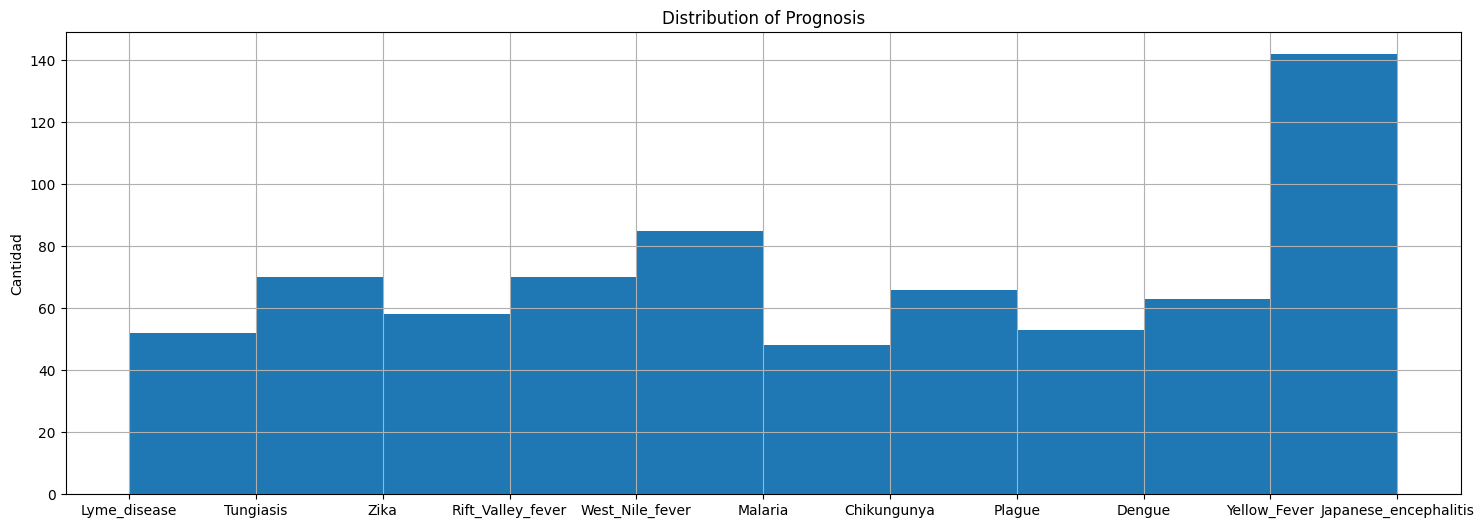

In [ ]:
plt.figure(figsize=(18, 6))
plt.hist(df_train['prognosis'])
plt.title(('Distribution of ' +  'Prognosis'))
plt.grid()
plt.ylabel("Cantidad")
plt.show()

<ipython-input-145-77d797845957>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


<Axes: >

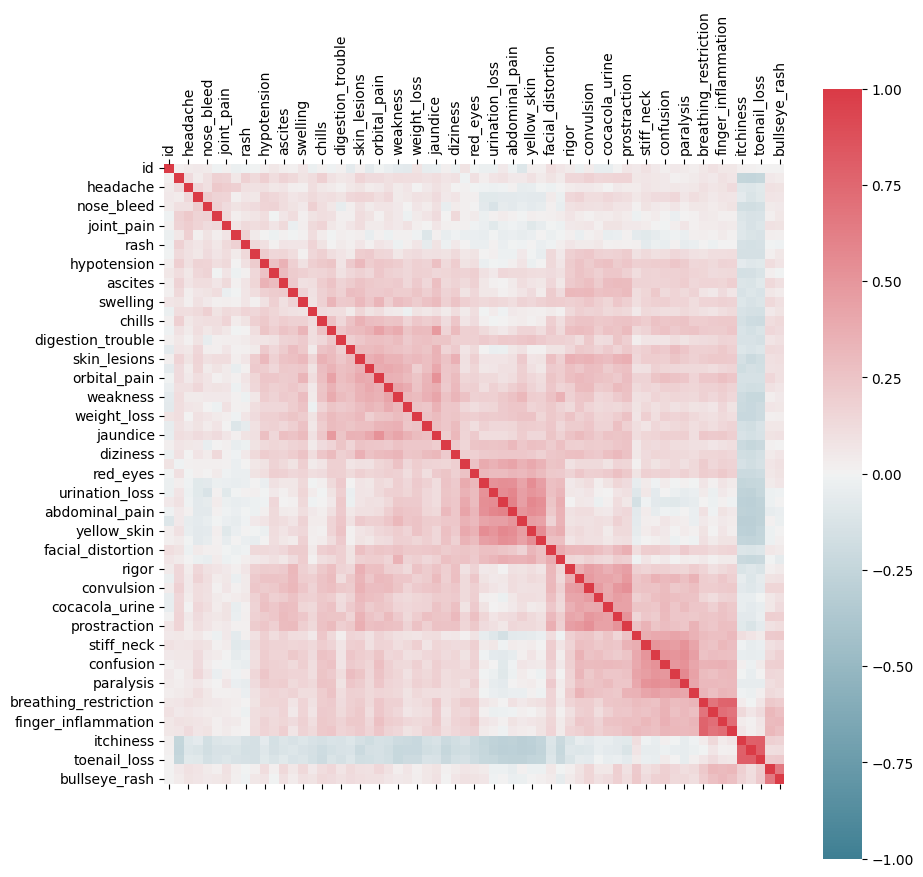

In [ ]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Continuando con el análsis de datos, se muestra la información resumida de los dataframe (train, test y sample_submission), donde se nota que no existen datos nulos, por lo que no es necesario aplicar una técnica de imputación de datos, además de que no se pueden identificar outliers dado que se está trabajando con variables del tipo binario.

In [ ]:
# Se muestra la información del dataframe train.csv
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Se muestra la información del dataframe train.csv
print(df_test.info())
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     303 non-null    int64  
 1   sudden_fever           303 non-null    float64
 2   headache               303 non-null    float64
 3   mouth_bleed            303 non-null    float64
 4   nose_bleed             303 non-null    float64
 5   muscle_pain            303 non-null    float64
 6   joint_pain             303 non-null    float64
 7   vomiting               303 non-null    float64
 8   rash                   303 non-null    float64
 9   diarrhea               303 non-null    float64
 10  hypotension            303 non-null    float64
 11  pleural_effusion       303 non-null    float64
 12  ascites                303 non-null    float64
 13  gastro_bleeding        303 non-null    float64
 14  swelling               303 non-null    float64
 15  nausea

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,858.000000,0.577558,0.462046,0.458746,0.504950,0.531353,0.541254,0.488449,0.448845,0.458746,...,0.145215,0.092409,0.099010,0.102310,0.118812,0.165017,0.128713,0.122112,0.052805,0.033003
std,87.612784,0.494765,0.499382,0.499120,0.500803,0.499842,0.499120,0.500693,0.498199,0.499120,...,0.352900,0.290082,0.299169,0.303557,0.324102,0.371809,0.335436,0.327957,0.224015,0.178941
min,707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,782.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,858.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,933.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Se muestra la información del dataframe train.csv
print(df_sample_submission.info())
df_sample_submission.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         303 non-null    int64 
 1   prognosis  303 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.9+ KB
None


,id
count,303.000000
mean,858.000000
std,87.612784
min,707.000000
25%,782.500000
50%,858.000000
75%,933.500000
max,1009.000000


# Preprocesamiento

De acuerdo con el análsis de datos de la sección de "Análisis exploratorio",se observó que no existen datos nulos, por lo que no es necesario aplicar una técnica de imputación de datos, además de que no se pueden identificar outliers dado que se está trabajando con variables del tipo binario.

# Métodos de clasificación

##Evaluación del overfitting

A continuación se establecen los datos que se usarán para el entrenamiento y validación del modelo, en este caso como describe el sitio original de los datos:
* X: corresponden a los datos del dataframe "train.csv" menos las columnas "id" y "prognosis".
* y: corresponde a la columna "prognosis" del dataframe "train.csv".
* X_train: corresponden a los datos del dataframe X después del split.
* y_train: corresponde a los datos del dataframe y después del split.
* X_test: corresponde a los datos del dataframe X después del split.
* y_test: corresponde a los datos del dataframe y después del split.

In [ ]:
X=df_train.copy()
X=X.drop(['id','prognosis'], axis=1)
X

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import preprocessing
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
y=df_train[["prognosis"]].copy()
y["prognosis"] = label_encoder.fit_transform(y['prognosis'])
y

,prognosis
0,3
1,7
2,3
3,10
4,6
...,...
702,5
703,4
704,10
705,5


>1, train: 1.000, test: 0.211
>2, train: 0.617, test: 0.211
>3, train: 0.484, test: 0.244
>4, train: 0.457, test: 0.254
>5, train: 0.437, test: 0.244
>6, train: 0.423, test: 0.263
>7, train: 0.405, test: 0.263
>8, train: 0.397, test: 0.244
>9, train: 0.368, test: 0.272
>10, train: 0.364, test: 0.272
>11, train: 0.370, test: 0.263
>12, train: 0.358, test: 0.263
>13, train: 0.356, test: 0.268
>14, train: 0.350, test: 0.282
>15, train: 0.346, test: 0.254
>16, train: 0.342, test: 0.272
>17, train: 0.326, test: 0.263
>18, train: 0.332, test: 0.258
>19, train: 0.330, test: 0.282
>20, train: 0.316, test: 0.277
>21, train: 0.318, test: 0.268
>22, train: 0.338, test: 0.296
>23, train: 0.338, test: 0.296
>24, train: 0.326, test: 0.305
>25, train: 0.324, test: 0.300
>26, train: 0.316, test: 0.291
>27, train: 0.314, test: 0.296
>28, train: 0.318, test: 0.291
>29, train: 0.308, test: 0.286
>30, train: 0.320, test: 0.286
>31, train: 0.308, test: 0.277
>32, train: 0.306, test: 0.296
>33, train: 0.308

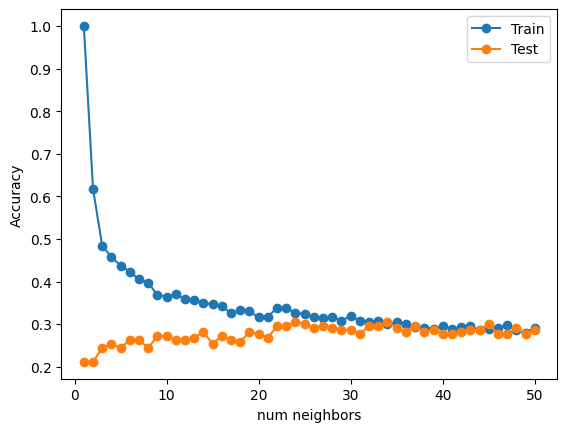

In [ ]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
#Se realiza el split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.ylabel("Accuracy")
pyplot.xlabel("num neighbors")
pyplot.legend()
pyplot.show()

Se observa que para una baja cantidad de vecinos el accuracy para los datos de entrenamiento es muy alto, mientras que para los datos de testeo el accuracy es muy bajo, ello debido a un overfitting. Por otro lado se observa un modelo "optimo" para un KNN con un número aproximado de 20 vecinos.

##Modelo de regresión

Se desarrolla un modelo de regresión, el que muestra un score perfecto con los datos de entrenamiento, mientras que, para los datos de testeo se obtiene un "test score", lo que indica que el modelo tiene un mal rendimiento que puede ser causado por overfitting, una mala elección de características o incluso el modelo.

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 1.0
Test score: -1.1083907619212763


###L2 penalización

Se aplicó un modelo de regularización L2 con el fin de mejorar el rendimiento en los datos de prueba, se usó un alpha de 10, con lo que se obtuvo metricas mejores para el test, mientras que el training score bajo hasta 0.99. Aunque mejoró el test score, aún es negativo por lo que el modelo no está teniendo un buen rendimiento. Por tanto se pasa a una regularización más estricta.

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.996737287312198
Test Score: -0.33698857977818797


###L1 penalización

Se aplicó un modelo de regularización con el fin de mejorar el rendimiento en los datos de prueba, se usó un alpha de 0.3, con lo que se obtuvo metricas mejores para el test, mientras que el training score bajo hasta 0.31. Por tanto se concluye que el modelo de regresión para este tipo de datos no es el adecuado.

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.31743280540794283
Test score: 0.16926282708822293


##Modelo KNN

Se realizará un modelo KNN con una reducción de características mediante PCA, dado que ya se analizó el modelo KNN en la sección "Evaluación overffiting" donde se determinó un limite de 0.3 para un número mayor igual que 20 vecinos.

In [ ]:
n_components = 20

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Extracting the top 20 eigenfaces from 494 faces
Projecting the input data on the eigenfaces orthonormal basis


In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

print("Fitting the classifier to the training set")

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1117.7309996221038, class_weight='balanced', gamma=0.0015862292614273368)


Predicting people's names on the test set
done in 0.008s
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.22      0.40      0.29        15
           2       0.14      0.13      0.13        23
           3       0.40      0.62      0.48        13
           4       0.32      0.53      0.40        15
           5       0.18      0.12      0.15        24
           6       0.27      0.21      0.24        19
           7       0.60      0.45      0.51        20
           8       0.28      0.21      0.24        24
           9       0.22      0.24      0.23        21
          10       0.00      0.00      0.00        17

    accuracy                           0.32       213
   macro avg       0.31      0.34      0.32       213
weighted avg       0.31      0.32      0.31       213



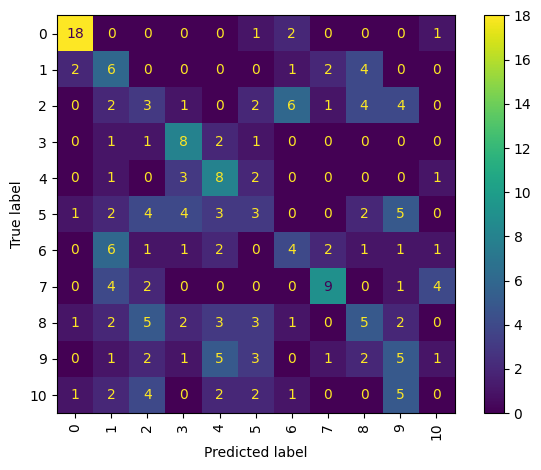

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred, labels=model.classes_))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=model.classes_, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

Se aplica el modelo al dataset de datos de testeo

In [161]:
df_test2=df_test.copy()
df_test2=df_test2.drop(['id'], axis=1)

n_components = 20
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(df_test2)

print("Projecting the input data on the eigenfaces orthonormal basis")
df_test2_pca = pca.transform(df_test2)

Projecting the input data on the eigenfaces orthonormal basis


In [165]:
y_pred_testdf = clf.predict(df_test2_pca)
etiquetas_originales = label_encoder.inverse_transform(y_pred_testdf)
etiquetas_originales

array(['Tungiasis', 'Tungiasis', 'Tungiasis', 'Dengue',
       'Rift_Valley_fever', 'West_Nile_fever', 'West_Nile_fever',
       'Yellow_Fever', 'Dengue', 'West_Nile_fever', 'Yellow_Fever',
       'Plague', 'Zika', 'Tungiasis', 'West_Nile_fever',
       'Rift_Valley_fever', 'Tungiasis', 'Chikungunya', 'Chikungunya',
       'Lyme_disease', 'Malaria', 'Dengue', 'Plague', 'Plague', 'Dengue',
       'Chikungunya', 'Japanese_encephalitis', 'Dengue', 'Dengue',
       'West_Nile_fever', 'West_Nile_fever', 'Yellow_Fever',
       'West_Nile_fever', 'Japanese_encephalitis', 'Malaria',
       'Rift_Valley_fever', 'Rift_Valley_fever', 'Dengue', 'Lyme_disease',
       'Japanese_encephalitis', 'Tungiasis', 'Tungiasis', 'Tungiasis',
       'Rift_Valley_fever', 'Dengue', 'Japanese_encephalitis',
       'Tungiasis', 'Lyme_disease', 'Dengue', 'Dengue', 'Yellow_Fever',
       'Chikungunya', 'Lyme_disease', 'West_Nile_fever',
       'West_Nile_fever', 'Lyme_disease', 'Rift_Valley_fever',
       'Tungiasis

###Conclusión

Se ha desarrollado un análsis de overfitting de acuerdo con el número de vecinos en un modelo KNN, donde se observa que para una baja cantidad de vecinos el accuracy para los datos de entrenamiento es muy alto, mientras que para los datos de testeo el accuracy es muy bajo, ello debido a un overfitting. Por otro lado se observa un modelo "optimo" para un KNN con un número aproximado de 20 vecinos, sin embargo, las métricas para dicho modelo llegan hasta un accuracy de 0.3.

En consecuencia se realizó un modelo de regresión simple el cual no mostró valores de un buen modelo ("Training score: 1.0" y "Test score: -1.1083907619212763"), que indicaba un sobreajuste a los datos de entrenamiento (overffiting), en ese sentido se aplicaron técnicas de regularización L1 y L2, las que si bien mejoraron los puntajes para los datos de entrenamiento, estos no fueron significativos para un buen modelo de entrenamiento.

Por último, se realizó un modelo KNN con la reducción de características aplicando PCA (con 20 características, con lo que se obtuvo un modelo menos complejo, lo que ayuda a reducir el overfitting para así obtener un mejor modelo respecto a los anteriores. En este sentido, se obtuvo un modelo con métricas de alrededor de 0.32.

#Bibliografía


Walter Reade, Will Lifferth, Ashley Chow. (2023). Classification with a Tabular Vector Borne Disease Dataset. Kaggle. https://kaggle.com/competitions/playground-series-s3e13